In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv('C:\\Users\\IDEAL COM\\Downloads\\Compressed\\archive_28\\loan.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
new_data=data.dropna()

In [8]:
new_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [10]:
new_data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)

C:\Users\IDEAL COM\AppData\Local\Temp\ipykernel_3732\1571428302.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)


In [11]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [12]:
new_data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [33]:
new_data=new_data.replace(to_replace='3+',value=4)

In [34]:
new_data['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

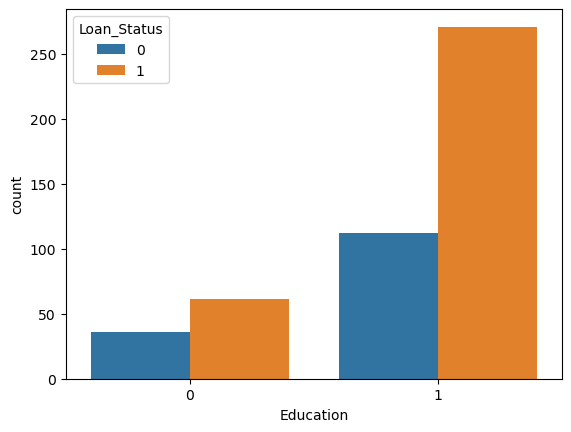

In [35]:
sns.countplot(x='Education',hue='Loan_Status',data=new_data)

<Axes: xlabel='Married', ylabel='count'>

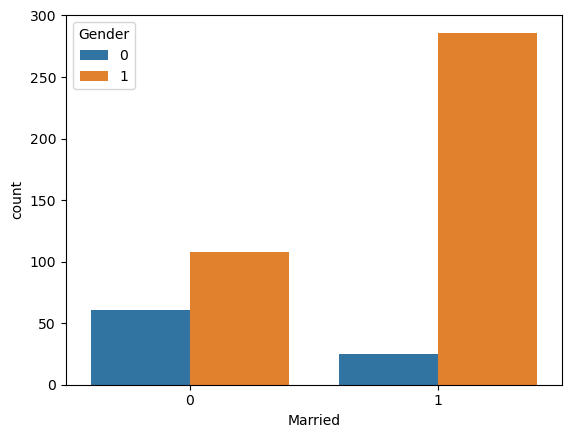

In [36]:
sns.countplot(x='Married',hue='Gender',data=new_data)

In [37]:
new_data['Gender'].value_counts()

1    394
0     86
Name: Gender, dtype: int64

In [38]:
new_data['Married'].value_counts()

1    311
0    169
Name: Married, dtype: int64

In [39]:
new_data['Education'].value_counts()

1    383
0     97
Name: Education, dtype: int64

In [40]:
new_data['Property_Area'].value_counts()

1    191
2    150
0    139
Name: Property_Area, dtype: int64

In [41]:
new_data['Self_Employed'].value_counts()

0    414
1     66
Name: Self_Employed, dtype: int64

In [42]:
new_data.replace({'Gender':{'Male':1,'Female':0},'Married':{'Yes':1,'No':0},'Education':{'Graduate':1,'Not Graduate':0},
                 'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Self_Employed':{'No':0,'Yes':1}
                 },inplace=True)

In [43]:
new_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [44]:
x=new_data.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y=new_data['Loan_Status']

In [45]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [46]:
print(x.shape,x_train.shape,x_test.shape)

(480, 11) (384, 11) (96, 11)


In [47]:
classifier=svm.SVC(kernel='linear')

In [48]:
classifier.fit(x_train,y_train)

SVC(kernel='linear')

In [49]:
training_data_prediction=classifier.predict(x_train)
training_data_accuracy=accuracy_score(training_data_prediction,y_train)
print('Accuracy Score On Training Data:',training_data_accuracy)

Accuracy Score On Training Data: 0.7786458333333334


In [51]:
test_data_prediction=classifier.predict(x_test)
test_data_accuracy=accuracy_score(test_data_prediction,y_test)
print('Accuracy Score On Test Data:',test_data_accuracy)

Accuracy Score On Test Data: 0.8125
